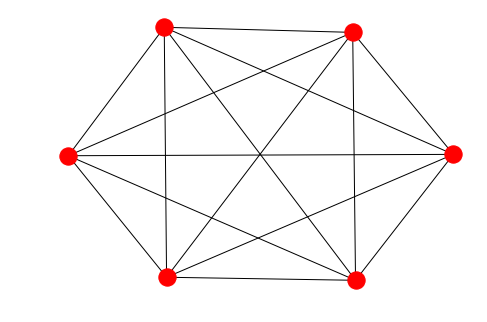

(0, 1), S = ()
0
(0, 2), S = ()
0
(0, 3), S = ()
0
(0, 4), S = ()
0
(0, 5), S = ()
0
(1, 0), S = ()
0
(1, 2), S = ()
0
(1, 3), S = ()
0
(1, 4), S = ()
0
(1, 5), S = ()
0
(2, 0), S = ()
0
(2, 1), S = ()
0
(2, 3), S = ()
0
(2, 4), S = ()
0
(2, 5), S = ()
0
(3, 0), S = ()
0
(3, 1), S = ()
0
(3, 2), S = ()
0
(3, 4), S = ()
0
(3, 5), S = ()
0
(4, 0), S = ()
0
(4, 1), S = ()
0
(4, 2), S = ()
0
(4, 3), S = ()
0
(4, 5), S = ()
0
(5, 0), S = ()
0
(5, 1), S = ()
0
(5, 2), S = ()
0
(5, 3), S = ()
0
(5, 4), S = ()
0
(0, 1), S = (2,)
0
(0, 1), S = (3,)
0
(0, 1), S = (4,)
0
(0, 1), S = (5,)
0
(0, 2), S = (1,)
0
(0, 2), S = (3,)
0
(0, 2), S = (4,)
0
(0, 2), S = (5,)
0
(0, 3), S = (1,)
0
(0, 3), S = (2,)
0
(0, 3), S = (4,)
0
(0, 3), S = (5,)
0
(0, 4), S = (1,)
0
(0, 4), S = (2,)
0
(0, 4), S = (3,)
0
(0, 4), S = (5,)
0
(0, 5), S = (1,)
0
(0, 5), S = (2,)
0
(0, 5), S = (3,)
0
(0, 5), S = (4,)
0
(1, 0), S = (2,)
0
(1, 0), S = (3,)
0
(1, 0), S = (4,)
0
(1, 0), S = (5,)
0
(1, 2), S = (0,)
0
(1, 2), S = (3,

In [57]:
import numpy as np
import pandas as pd
import csv
from itertools import combinations, permutations
import networkx as nx
import matplotlib.pyplot as plt

# Nodes of the graph
nodes = range(6)
l = -1

# Creating the full undirected graph to start with:
Graph = nx.Graph()
Graph.add_nodes_from(nodes)
for (i, j) in combinations(nodes, 2):
    Graph.add_edge(i, j)
    pass

def test (data, i, j, set):
    p = 0
    print(p)
    return p

alpha = 0.8
data = []

plt.figure()
nx.draw(Graph)
plt.show()

while True:
    l = l + 1
    for (i, j) in permutations(nodes, 2):
        adjacents = list(Graph.neighbors(i))
        if j in adjacents:
            adjacents.remove(j)
            if len(adjacents)>=l:
                for S in combinations(adjacents, l):
                    print("(%d, %d), S = %s" %(i, j, str(S)))
                    p_val = test(data, i, j, S)
                    if p_val > alpha:
                        Graph.remove_edge(i, j)
                        plt.figure()
                        nx.draw(Graph)
                        plt.show()
                        print("Removed %d, %d" %(i, j))
    if l == 6:
        break
        
        


In [4]:





while True:
        cont = False
        remove_edges = []
        for (i, j) in permutations(node_ids, 2):
            adj_i = list(g.neighbors(i))
            if j not in adj_i:
                continue
            else:
                adj_i.remove(j)
                pass
            if len(adj_i) >= l:
                print('testing %s and %s' % (i,j))
                print('neighbors of %s are %s' % (i, str(adj_i)))
                if len(adj_i) < l:
                    continue
                for k in combinations(adj_i, l):
                    _logger.debug('indep prob of %s and %s with subset %s'
                                  % (i, j, str(k)))
                    p_val = indep_test_func(data_matrix, i, j, set(k),
                                            **kwargs)
                    _logger.debug('p_val is %s' % str(p_val))
                    if p_val > alpha:
                        if g.has_edge(i, j):
                            _logger.debug('p: remove edge (%s, %s)' % (i, j))
                            if method_stable(kwargs):
                                remove_edges.append((i, j))
                            else:
                                g.remove_edge(i, j)
                            pass
                        sep_set[i][j] |= set(k)
                        sep_set[j][i] |= set(k)
                        break
                    pass
                cont = True
                pass
            pass
        l += 1
        if method_stable(kwargs):
            g.remove_edges_from(remove_edges)
        if cont is False:
            break
        if ('max_reach' in kwargs) and (l > kwargs['max_reach']):
            break
        pass

return (g, sep_set)

NameError: name 'node_ids' is not defined